# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBRFClassifier

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [18]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, sep=',', names=names)
df.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [19]:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

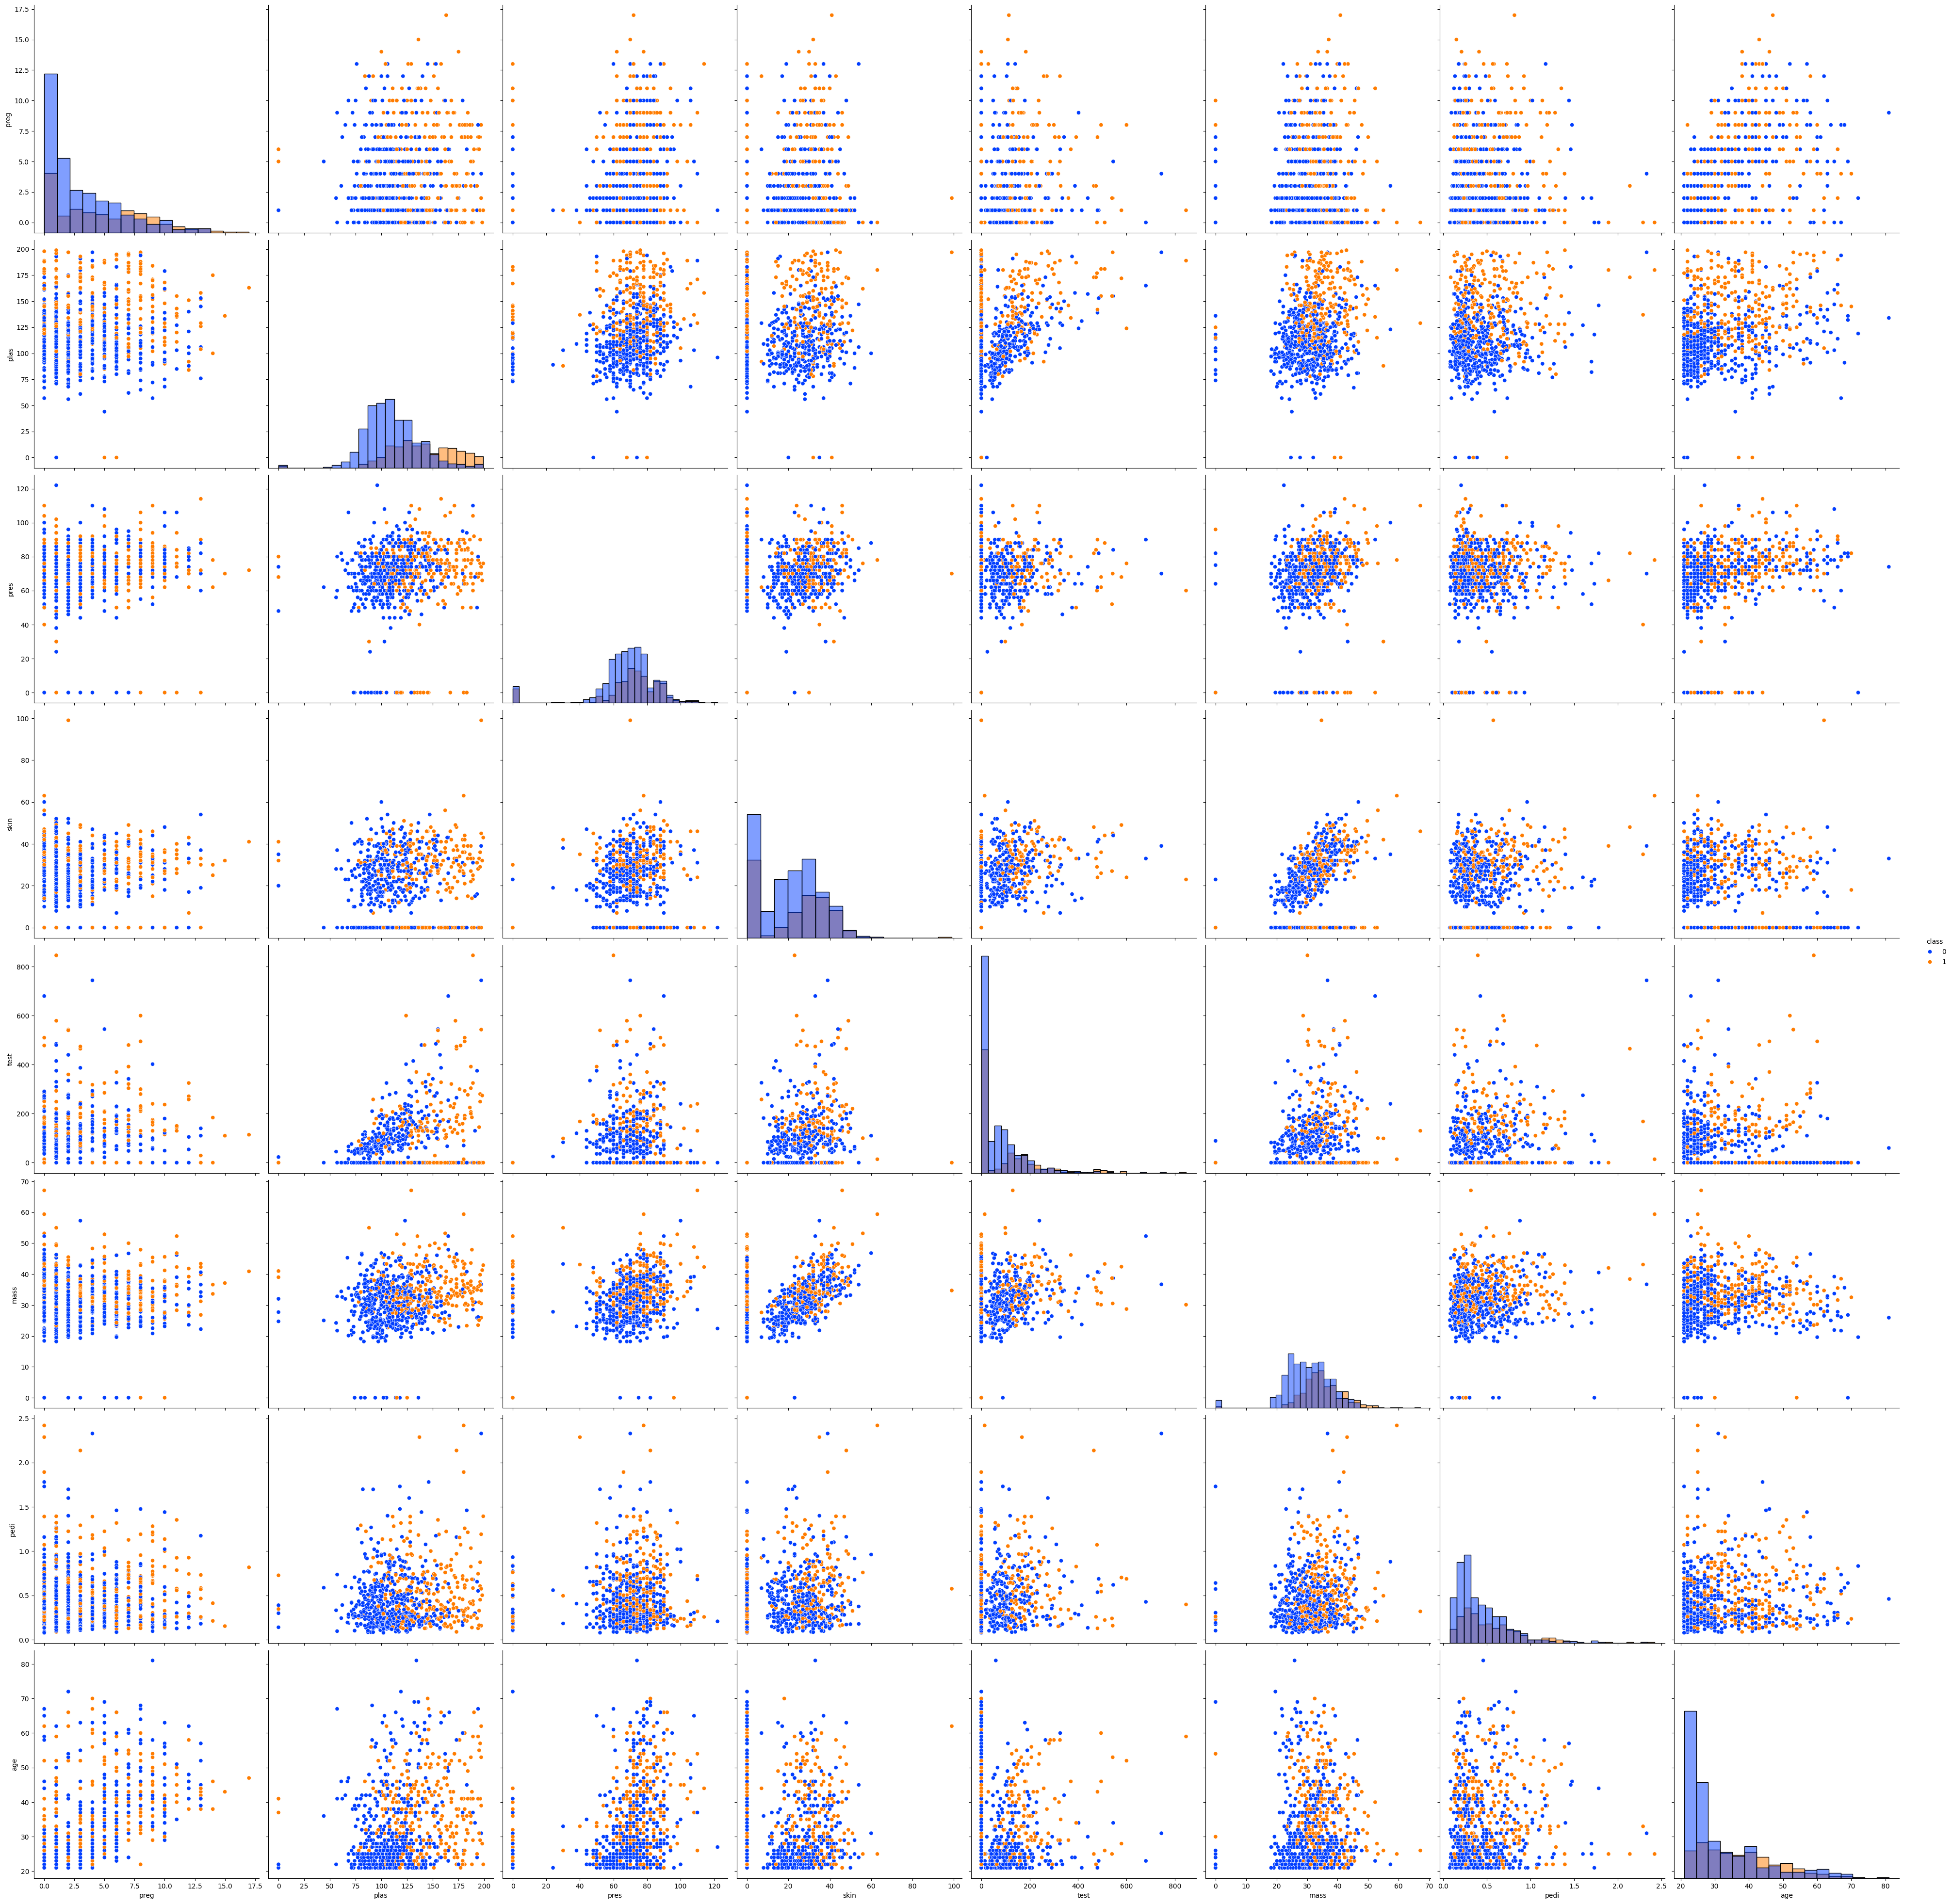

In [22]:
sns.pairplot(df, hue='class', diag_kind='hist', palette='bright', height=5, aspect=1)

<Axes: >

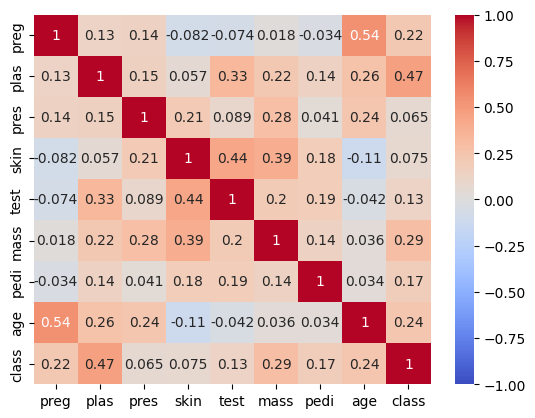

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)

In [24]:
df_corrs = df.corr(numeric_only=True)
df_corrs[df_corrs['class']< 1]['class'].sort_values(ascending=False)

plas    0.466581
mass    0.292695
age     0.238356
preg    0.221898
pedi    0.173844
test    0.130548
skin    0.074752
pres    0.065068
Name: class, dtype: float64

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [25]:
X = df.drop(columns='class', axis=1)
y = df['class']

In [26]:
estimator = DecisionTreeClassifier(max_depth=5, random_state=10)

bag_clf = BaggingClassifier(
    estimator=estimator,
    n_estimators=100,
    random_state=10
)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores_bag_clf = cross_val_score(bag_clf, X, y, cv=kf, scoring='accuracy')

print("Accuracy por fold:", scores_bag_clf)
print("Accuracy promedio:", np.mean(scores_bag_clf))    # el que nos interesa
print("Desviación estándar:", np.std(scores_bag_clf))


Accuracy por fold: [0.72727273 0.81818182 0.74025974 0.84415584 0.81818182 0.72727273
 0.84415584 0.72727273 0.68421053 0.76315789]
Accuracy promedio: 0.7694121667805879
Desviación estándar: 0.05422701257270322


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [27]:
rnd_clf = RandomForestClassifier(random_state=10,
                                 n_estimators=100,
                                 max_features=3,
                                 max_depth=5)

kf = KFold(n_splits=10, shuffle=True, random_state=10)
scores_rnd_clf = cross_val_score(rnd_clf, X, y, cv=kf, scoring='accuracy')

print("Accuracy por fold:", scores_rnd_clf)
print("Accuracy promedio:", np.mean(scores_rnd_clf))
print("Desviación estándar:", np.std(scores_rnd_clf))

Accuracy por fold: [0.74025974 0.77922078 0.76623377 0.76623377 0.80519481 0.74025974
 0.7012987  0.84415584 0.75       0.75      ]
Accuracy promedio: 0.7642857142857143
Desviación estándar: 0.037166462392868006


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [28]:
estimator = DecisionTreeClassifier(max_depth=5)

adab_clf = AdaBoostClassifier(
    estimator=estimator,
    n_estimators=30,
    learning_rate=.5,
    random_state=10
)

adab_clf.fit(X, y)
adab_clf.score(X, y)


0.91796875

In [29]:

pred_adab_clf = adab_clf.predict(X)
accuracy_score(y, pred_adab_clf)



0.91796875

In [30]:
adab_clf.feature_importances_

array([0.07712536, 0.20647097, 0.05378553, 0.04244674, 0.06823635,
       0.27601539, 0.14678729, 0.12913237])

In [31]:
sns.barplot(x=list(X.columns), y=adab_clf.feature_importances_, palette='bright');

C:\Users\Ana\AppData\Local\Temp\ipykernel_9084\3475533405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(X.columns), y=adab_clf.feature_importances_, palette='bright');


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [32]:
gb_clf = GradientBoostingClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=.5,
    random_state=10
    )

gb_clf.fit(X, y)
gb_clf.score(X, y)

1.0

In [33]:
dt = DecisionTreeClassifier(max_depth=5) # siempre usa DTC como modelo; no se puede cambiar
gbc = GradientBoostingClassifier(max_depth=5, n_estimators=100, random_state=10, learning_rate=.5)
cv_gbc = cross_val_score(gbc, X, y, cv=10, scoring="accuracy")


1.0 overfitting

In [34]:
print(cv_gbc)
print(cv_gbc.mean())

[0.71428571 0.76623377 0.80519481 0.64935065 0.72727273 0.76623377
 0.80519481 0.80519481 0.75       0.77631579]
0.7565276828434724


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [35]:
xgb_clf = XGBRFClassifier(
    random_state=10,
    n_estimators = 100,
    booster='gbtree',
    learning_rate=0.5,
    max_depth=5
    )

xgb_clf.fit(X, y)
xgb_clf.score(X, y)

0.8216145833333334

In [36]:
xgb = XGBRFClassifier(n_estimator = 100, random_state=10, learning_rate=.5)
cv_xgb = cross_val_score(xgb, X, y, cv=10, scoring="accuracy")

c:\Users\Ana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:36] WARNING: C:\actions-runner\_work\xgboost\xg

In [37]:
print(cv_xgb)
print(cv_xgb.mean())

[0.75324675 0.75324675 0.75324675 0.72727273 0.71428571 0.79220779
 0.77922078 0.81818182 0.73684211 0.77631579]
0.7604066985645932


### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [38]:
modelos_dict = {'Bagging': scores_bag_clf, 'RandmForest': scores_rnd_clf, 'AdaBoost': adab_clf, 'GradientBoosting': gb_clf, 'XGBoost': xgb_clf}
res_modelos_dict = {}

for k, v in modelos_dict.items():
    # print(v)
    if k == 'Bagging':
        res_modelos_dict[k] = np.mean(scores_bag_clf)
    elif k == 'RandmForest':
        res_modelos_dict[k] = np.mean(scores_rnd_clf)
    else:
        res_modelos_dict[k] = v.score(X,y)

print(res_modelos_dict)

df_scores = pd.DataFrame.from_dict(res_modelos_dict, orient='index', columns=['Score'])
df_scores

{'Bagging': np.float64(0.7694121667805879), 'RandmForest': np.float64(0.7642857142857143), 'AdaBoost': 0.91796875, 'GradientBoosting': 1.0, 'XGBoost': 0.8216145833333334}


Score
Bagging           0.769412
RandmForest       0.764286
AdaBoost          0.917969
GradientBoosting  1.000000
XGBoost           0.821615

In [39]:
df_scores_2 = pd.DataFrame([res_modelos_dict])
df_scores_2

Bagging  RandmForest  AdaBoost  GradientBoosting   XGBoost
0  0.769412     0.764286  0.917969               1.0  0.821615

### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [40]:
res_hiper = {}

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# DecisionTreeClasifier

dtc_gs = DecisionTreeClassifier(random_state=10)

params_dtc = {
    "max_depth": [1, 3, 5, 7]
}

gs_dtc = GridSearchCV(dtc_gs, params_dtc, scoring="accuracy", cv=5)
gs_dtc.fit(X_train, y_train)

print('mejar param:', gs_dtc.best_params_["max_depth"])
print('mejor accuracy', gs_dtc.best_score_)

model_f = gs_dtc.best_estimator_

model_f.predict(X_test)
print('Acc en test:', accuracy_score(y_test, model_f.predict(X_test)))

res_hiper['DecisionTreeClasifier'] = {"mejor_param:": gs_dtc.best_params_, 'acc_modelo': gs_dtc.best_score_, 'acc_score': accuracy_score(y_test, model_f.predict(X_test))}


mejar param: 1
mejor accuracy 0.750859656137545
Acc en test: 0.6883116883116883


In [42]:
res_hiper

{'DecisionTreeClasifier': {'mejor_param:': {'max_depth': 1},
  'acc_modelo': np.float64(0.750859656137545),
  'acc_score': 0.6883116883116883}}

In [43]:
# RandomForest

rndf_clf = RandomForestClassifier(random_state=10)

params_rndf = {
    "n_estimators": [50, 100],
    "max_depth": [1, 3, 5, 7],
    "max_features":[3],
    "bootstrap":[True, False]
}

gs_rndf = GridSearchCV(rndf_clf, params_rndf, scoring="accuracy", cv=5, n_jobs=-1)
gs_rndf.fit(X_train, y_train)

print('mejar param:', gs_rndf.best_params_)
print('mejor accuracy', gs_rndf.best_score_)

model_rndf = gs_rndf.best_estimator_
model_rndf.predict(X_test)
print('Acc', accuracy_score(y_test, model_rndf.predict(X_test)))

res_hiper['RandomForest_'] = {"mejor_param:": gs_rndf.best_params_, 'acc_modelo': gs_rndf.best_score_, 'acc_score': accuracy_score(y_test, model_rndf.predict(X_test))}


mejar param: {'bootstrap': False, 'max_depth': 7, 'max_features': 3, 'n_estimators': 100}
mejor accuracy 0.783406637345062
Acc 0.7727272727272727


In [44]:
# AdaBoostClf

adab_clf = AdaBoostClassifier(random_state=10)

params_adab_clf = {
    "estimator": [DecisionTreeClassifier(max_depth=d) for d in [1, 3, 5, 7]],
    "n_estimators": [50, 100],
    "learning_rate":[0.5, 1.],
}

gs_adab_clf = GridSearchCV(adab_clf, params_adab_clf, scoring="accuracy", cv=5)
gs_adab_clf.fit(X_train, y_train)

print('mejor param:', gs_adab_clf.best_params_)
print('mejor acc:', gs_adab_clf.best_score_)

model_adab = gs_adab_clf.best_estimator_
model_adab.predict(X_test)
print('Acc:', accuracy_score(y_test, model_adab.predict(X_test)))

res_hiper['AdaBoost'] = {"mejor_param:": gs_adab_clf.best_params_, 'acc_modelo': gs_adab_clf.best_score_, 'acc_score': accuracy_score(y_test, model_adab.predict(X_test))}


mejor param: {'estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.5, 'n_estimators': 50}
mejor acc: 0.7703185392509664
Acc: 0.7337662337662337


In [45]:
# GradientBoosting

gB_clf = GradientBoostingClassifier(random_state=10)

params_gB_clf = {
    "max_depth":[1, 3, 5, 7],
    "n_estimators":[50, 100],
    "learning_rate":[.5, 1.],
}

gs_gB_clf = GridSearchCV(gB_clf, params_gB_clf, scoring="accuracy", cv=5)
gs_gB_clf.fit(X_train, y_train)

print('mejor param:', gs_gB_clf.best_params_)
print('acc:', gs_gB_clf.best_score_)

model_gB = gs_gB_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, model_gB))

res_hiper['GradientBoosting'] = {"mejor_param:": gs_gB_clf.best_params_, 'acc_modelo': gs_gB_clf.best_score_, 'acc_score': accuracy_score(y_test, model_gB)}


mejor param: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}
acc: 0.7671064907370386
Accuracy: 0.7337662337662337


In [46]:
# XGBoost

xgB_clf = XGBRFClassifier(random_state=10)

params_xgB_clf = {
    "max_depth":[1, 3, 5, 7],
    "n_estimators":[50, 100],
    "learning_rate":[.5, 1.],
    "booster":['gbtree'],
}

gs_xgB_clf = GridSearchCV(xgB_clf, params_xgB_clf, scoring="accuracy", cv=5)
gs_xgB_clf.fit(X_train, y_train)

# print('mejor param:', gs_xgB_clf.best_estimator_['max_depth'],  gs_xgB_clf.best_estimator_['n_estimators'], gs_xgB_clf.best_estimator_['learning_rate'])
best_model = gs_xgB_clf.best_estimator_
print('mejor param:',
      best_model.get_params()['max_depth'],
      best_model.get_params()['n_estimators'],
      best_model.get_params()['learning_rate'])
print(gs_xgB_clf.best_score_)

model_xgB = gs_xgB_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, model_xgB))

res_hiper['XGBoost'] = {"mejor_param:": [best_model.get_params()['max_depth'],
      best_model.get_params()['n_estimators'],
      best_model.get_params()['learning_rate']], 'acc_modelo': gs_xgB_clf.best_score_, 'acc_score': accuracy_score(y_test, model_xgB)}


mejor param: 7 100 1.0
0.7801412768226041
Accuracy: 0.7662337662337663


### 10. Conclusiones finales

Escogemos el modelo que mejor generalice, es decir, el que tenga mejor métrica ante test (RF hiperparametrizado)

In [47]:
res_hiper

{'DecisionTreeClasifier': {'mejor_param:': {'max_depth': 1},
  'acc_modelo': np.float64(0.750859656137545),
  'acc_score': 0.6883116883116883},
 'RandomForest_': {'mejor_param:': {'bootstrap': False,
   'max_depth': 7,
   'max_features': 3,
   'n_estimators': 100},
  'acc_modelo': np.float64(0.783406637345062),
  'acc_score': 0.7727272727272727},
 'AdaBoost': {'mejor_param:': {'estimator': DecisionTreeClassifier(max_depth=5),
   'learning_rate': 0.5,
   'n_estimators': 50},
  'acc_modelo': np.float64(0.7703185392509664),
  'acc_score': 0.7337662337662337},
 'GradientBoosting': {'mejor_param:': {'learning_rate': 0.5,
   'max_depth': 3,
   'n_estimators': 50},
  'acc_modelo': np.float64(0.7671064907370386),
  'acc_score': 0.7337662337662337},
 'XGBoost': {'mejor_param:': [7, 100, 1.0],
  'acc_modelo': np.float64(0.7801412768226041),
  'acc_score': 0.7662337662337663}}

In [48]:
df_resumen = pd.DataFrame.from_dict(res_hiper, orient='index')
df_resumen.rename( columns={'mejor_param:':'best_params', 'acc_modelo':'cv_accuracy', 'acc_score':'test_accuracy'}, inplace=True)
df_resumen.sort_values(by='cv_accuracy', ascending=False)

best_params  \
RandomForest_          {'bootstrap': False, 'max_depth': 7, 'max_feat...   
XGBoost                                                    [7, 100, 1.0]   
AdaBoost               {'estimator': DecisionTreeClassifier(max_depth...   
GradientBoosting       {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...   
DecisionTreeClasifier                                   {'max_depth': 1}   

                       cv_accuracy  test_accuracy  
RandomForest_             0.783407       0.772727  
XGBoost                   0.780141       0.766234  
AdaBoost                  0.770319       0.733766  
GradientBoosting          0.767106       0.733766  
DecisionTreeClasifier     0.750860       0.688312

# Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("model", BaggingClassifier())])

params = [{
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model": [BaggingClassifier(random_state=10)],
    "model__n_estimators": [50, 100, 150],
    "model__max_samples": [.5, 1.],
},
{
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model": [RandomForestClassifier(random_state=10)],
    "model__n_estimators": [50, 100, 150],
    "model__max_depth": [3, 5, 7, 10, 12],
},
{
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model": [AdaBoostClassifier(random_state=10)],
    "model__n_estimators": [50, 100, 150],
    "model__learning_rate": [.5, .75],
},
{
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model": [GradientBoostingClassifier(random_state=10)],
    "model__n_estimators": [50, 100, 150],
    "model__learning_rate": [.5, .75],
},
{
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model": [XGBRFClassifier(random_state=10)],
    "model__n_estimators": [50, 100, 150],
    "model__learning_rate": [.5, .75],
    "model__max_depth": [3, 5, 7, 10, 12],
}]

gs_final = GridSearchCV(pipeline, params, cv=3, scoring="accuracy", n_jobs=1, verbose=3)
gs_final.fit(X_train, y_train)


Fitting 3 folds for each of 189 candidates, totalling 567 fits
[CV 1/3] END model=BaggingClassifier(random_state=10), model__max_samples=0.5, model__n_estimators=50, scaler=None;, score=0.741 total time=   0.1s
[CV 2/3] END model=BaggingClassifier(random_state=10), model__max_samples=0.5, model__n_estimators=50, scaler=None;, score=0.776 total time=   0.0s
[CV 3/3] END model=BaggingClassifier(random_state=10), model__max_samples=0.5, model__n_estimators=50, scaler=None;, score=0.775 total time=   0.0s
[CV 1/3] END model=BaggingClassifier(random_state=10), model__max_samples=0.5, model__n_estimators=50, scaler=StandardScaler();, score=0.737 total time=   0.0s
[CV 2/3] END model=BaggingClassifier(random_state=10), model__max_samples=0.5, model__n_estimators=50, scaler=StandardScaler();, score=0.771 total time=   0.0s
[CV 3/3] END model=BaggingClassifier(random_state=10), model__max_samples=0.5, model__n_estimators=50, scaler=StandardScaler();, score=0.775 total time=   0.0s
[CV 1/3] END 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', BaggingClassifier())]),
             n_jobs=1,
             param_grid=[{'model': [BaggingClassifier(random_state=10)],
                          'model__max_samples': [0.5, 1.0],
                          'model__n_estimators': [50, 100, 150],
                          'scaler': [None, StandardScaler(), MinMaxScaler()]},
                         {'model': [RandomForestClassifier(random_state=10)],
                          'model__max_d...
                                                    min_child_weight=None,
                                                    missing=nan,
                                                    monotone_constraints=None,
                                                    multi_strategy=None,
                                                    n_estimators=None,
                                                    n_jobs=None,
                                                    num_parallel_tree=None,
                                                    objective='binary:logistic',
                                                    random_state=10, ...)],
                          'model__learning_rate': [0.5, 0.75],
                          'model__max_depth': [3, 5, 7, 10, 12],
                          'model__n_estimators': [50, 100, 150],
                          'scaler': [None, StandardScaler(), MinMaxScaler()]}],
             scoring='accuracy', verbose=3)

In [51]:
gs_final.best_params_

{'model': RandomForestClassifier(random_state=10),
 'model__max_depth': 5,
 'model__n_estimators': 150,
 'scaler': MinMaxScaler()}

In [52]:
gs_final.best_score_

np.float64(0.7720149848557308)

In [53]:
model_final = gs_final.predict(X_test)
accuracy_score(y_test, model_final)

0.7402597402597403